In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pathlib import Path

# Testing for val_exps and non_zeros

# EncodecMAE (Encodec) and BERT

In [9]:
def get_accuracy_top1(j=6, h=0, p=6, k=250):
    asif_value = 0
    with open(f'retrieval_base_layer9_bert-base-uncased_layer3_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    words = []
    count_top1 = 0 
    keys_test = [retrieval['all_values'][i] for i in retrieval['rows_deleted']]
    total = len(keys_test)
    for i in range(total):
        word = keys_test[i]
        k_1 = retrieval['retrieval_indices'][i][0]
        if word == retrieval['keys_anchors'][k_1]:
            count_top1 += 1
    asif_value = count_top1 / total
    return asif_value, words 


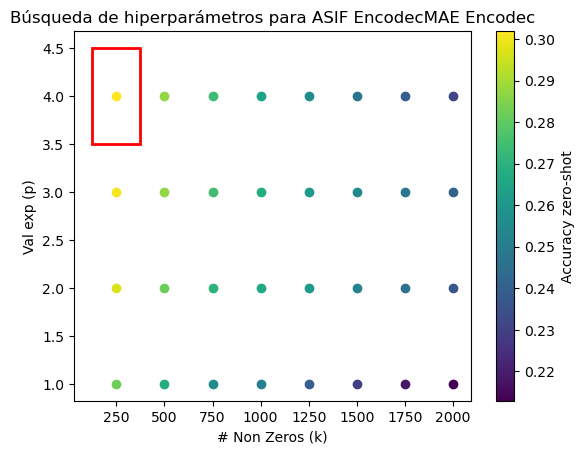

In [13]:
# Define the ranges for val_exp and non_zeros
val_exp_range = np.arange(1, 5, 1)  # from 1 to 4 inclusive
non_zeros_range = np.arange(250, 2001, 250)  # from 250 to 2000 inclusive with a step of 250

# Generate data
data = np.zeros((len(val_exp_range), len(non_zeros_range)))

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        data[i, j] = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]

# Create the plot
fig, ax = plt.subplots()

# Create a scatter plot
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=data.min(), vmax=data.max())

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        ax.scatter(non_zeros, val_exp, color=cmap(norm(data[i, j])))

# Add a color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Accuracy zero-shot')

# Highlight a specific point (e.g., val_exp=8, non_zeros=750)
highlight_point_val_exp = 4  # Change to your specific point
highlight_point_non_zeros = 250  # Change to your specific point

# Find the index of the highlight point
highlight_val_exp_idx = np.where(val_exp_range == highlight_point_val_exp)[0][0]
highlight_non_zeros_idx = np.where(non_zeros_range == highlight_point_non_zeros)[0][0]

# Draw a red rectangle around the highlight point
rect = plt.Rectangle((highlight_point_non_zeros - 125, highlight_point_val_exp - 0.5), 250, 1, 
                     edgecolor='red', facecolor='none', linewidth=2)
ax.add_patch(rect)

ax.set_title('Búsqueda de hiperparámetros para ASIF EncodecMAE Encodec')
ax.set_xlabel('# Non Zeros (k)')
ax.set_ylabel('Val exp (p)')

plt.show()

In [14]:
# Probamos con 4 puntos mas
additional_points = [
    (1, 100),
    (2, 100),
    (3, 100),
    (4, 10),
    (4, 50),
    (4, 100),
    (4, 150),
    (4, 200),
    (4, 250),  # (val_exp, non_zeros)
    (5, 250),  # (val_exp, non_zeros)
    (6, 250),
    (7, 250),
    (8, 250),
    (9, 250),   
]

# Agregar los puntos adicionales al gráfico
for val_exp, non_zeros in additional_points:
    accuracy = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]
    print(f'val_exp: {val_exp} and non_zeros: {non_zeros} with zero-shot accuracy: {accuracy}')

val_exp: 1 and non_zeros: 100 with zero-shot accuracy: 0.2962331201137171
val_exp: 2 and non_zeros: 100 with zero-shot accuracy: 0.3026297085998578
val_exp: 3 and non_zeros: 100 with zero-shot accuracy: 0.3074626865671642
val_exp: 4 and non_zeros: 10 with zero-shot accuracy: 0.23425728500355367
val_exp: 4 and non_zeros: 50 with zero-shot accuracy: 0.2921108742004264
val_exp: 4 and non_zeros: 100 with zero-shot accuracy: 0.3110163468372424
val_exp: 4 and non_zeros: 150 with zero-shot accuracy: 0.3060412224591329
val_exp: 4 and non_zeros: 200 with zero-shot accuracy: 0.3054726368159204
val_exp: 4 and non_zeros: 250 with zero-shot accuracy: 0.3019189765458422
val_exp: 5 and non_zeros: 250 with zero-shot accuracy: 0.3013503909026297
val_exp: 6 and non_zeros: 250 with zero-shot accuracy: 0.3002132196162047
val_exp: 7 and non_zeros: 250 with zero-shot accuracy: 0.29637526652452023
val_exp: 8 and non_zeros: 250 with zero-shot accuracy: 0.0022743425728500356
val_exp: 9 and non_zeros: 250 with 

# EncodecMAE (Encodec) and GloVe

In [16]:
def get_accuracy_top1(j=6, h=0, p=6, k=250):
    asif_value = 0
    with open(f'retrieval_base_layer9_glove_layer0_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    words = []
    count_top1 = 0 
    keys_test = [retrieval['all_values'][i] for i in retrieval['rows_deleted']]
    total = len(keys_test)
    for i in range(total):
        word = keys_test[i]
        k_1 = retrieval['retrieval_indices'][i][0]
        if word == retrieval['keys_anchors'][k_1]:
            count_top1 += 1
    asif_value = count_top1 / total
    return asif_value, words 

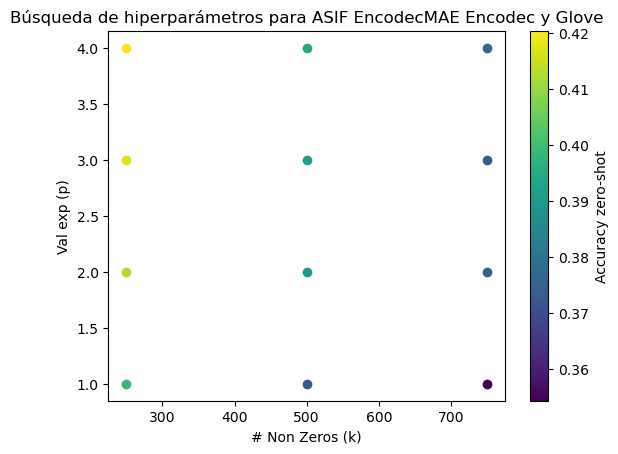

In [21]:
# Define the ranges for val_exp and non_zeros
val_exp_range = np.arange(1, 5, 1)  # from 1 to 4 inclusive
non_zeros_range = np.arange(250, 751, 250)  # from 250 to 2000 inclusive with a step of 250

# Generate data
data = np.zeros((len(val_exp_range), len(non_zeros_range)))

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        data[i, j] = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]

fig, ax = plt.subplots()
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=data.min(), vmax=data.max())

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        ax.scatter(non_zeros, val_exp, color=cmap(norm(data[i, j])))

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Accuracy zero-shot')


ax.set_title('Búsqueda de hiperparámetros para ASIF EncodecMAE Encodec y Glove')
ax.set_xlabel('# Non Zeros (k)')
ax.set_ylabel('Val exp (p)')

plt.show()

In [18]:
# Probamos con algunos puntos mas
additional_points = [
    (1, 100),
    (2, 100),
    (3, 100),
    (4, 10),
    (4, 50),
    (4, 100),
    (4, 150),
    (4, 200),
    (4, 250),  # (val_exp, non_zeros)
    (5, 250),  # (val_exp, non_zeros)
    (6, 250),
    (7, 250),
    (8, 250),
    (9, 250),   
]

# Agregar los puntos adicionales al gráfico
for val_exp, non_zeros in additional_points:
    accuracy = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]
    print(f'val_exp: {val_exp} and non_zeros: {non_zeros} with zero-shot accuracy: {accuracy}')

val_exp: 1 and non_zeros: 100 with zero-shot accuracy: 0.21194029850746268
val_exp: 2 and non_zeros: 100 with zero-shot accuracy: 0.21705756929637526
val_exp: 3 and non_zeros: 100 with zero-shot accuracy: 0.2120824449182658
val_exp: 4 and non_zeros: 10 with zero-shot accuracy: 0.05216773276474769
val_exp: 4 and non_zeros: 50 with zero-shot accuracy: 0.16162046908315564
val_exp: 4 and non_zeros: 100 with zero-shot accuracy: 0.19232409381663113
val_exp: 4 and non_zeros: 150 with zero-shot accuracy: 0.23098791755508175
val_exp: 4 and non_zeros: 200 with zero-shot accuracy: 0.23283582089552238
val_exp: 4 and non_zeros: 250 with zero-shot accuracy: 0.22629708599857853
val_exp: 5 and non_zeros: 250 with zero-shot accuracy: 0.224591329068941
val_exp: 6 and non_zeros: 250 with zero-shot accuracy: 0.25145700071073207
val_exp: 7 and non_zeros: 250 with zero-shot accuracy: 0.2507462686567164
val_exp: 8 and non_zeros: 250 with zero-shot accuracy: 0.2386638237384506
val_exp: 9 and non_zeros: 250 wi

# EncodecMAE (MEL) con BERT

In [22]:
def get_accuracy_top1(j=6, h=0, p=6, k=250):
    asif_value = 0
    with open(f'retrieval_mel256-ec-base_layer9_bert-base-uncased_layer0_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    words = []
    count_top1 = 0 
    keys_test = [retrieval['all_values'][i] for i in retrieval['rows_deleted']]
    total = len(keys_test)
    for i in range(total):
        word = keys_test[i]
        k_1 = retrieval['retrieval_indices'][i][0]
        if word == retrieval['keys_anchors'][k_1]:
            count_top1 += 1
    asif_value = count_top1 / total
    return asif_value, words 


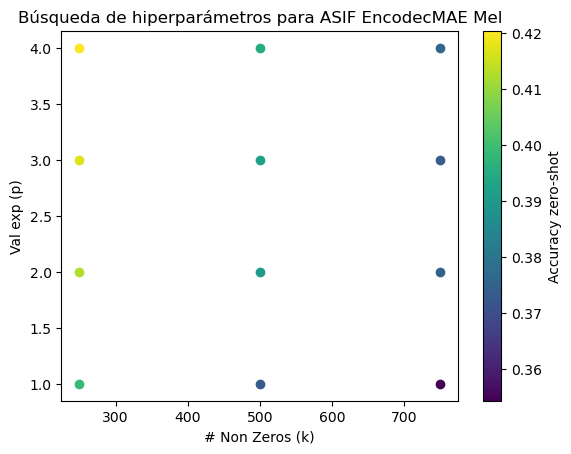

In [25]:
# Define the ranges for val_exp and non_zeros
val_exp_range = np.arange(1, 5, 1)  # from 1 to 4 inclusive
non_zeros_range = np.arange(250, 751, 250)  # from 250 to 2000 inclusive with a step of 250

# Generate data
data = np.zeros((len(val_exp_range), len(non_zeros_range)))

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        data[i, j] = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]

# Create the plot
fig, ax = plt.subplots()

# Create a scatter plot
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=data.min(), vmax=data.max())

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        ax.scatter(non_zeros, val_exp, color=cmap(norm(data[i, j])))

# Add a color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Accuracy zero-shot')


ax.set_title('Búsqueda de hiperparámetros para ASIF EncodecMAE Mel')
ax.set_xlabel('# Non Zeros (k)')
ax.set_ylabel('Val exp (p)')

plt.show()

In [26]:
# Probamos con algunos puntos mas
additional_points = [
    (1, 100),
    (2, 100),
    (3, 100),
    (4, 10),
    (4, 50),
    (4, 100),
    (4, 150),
    (4, 200),
    (4, 250),  # (val_exp, non_zeros)
    (5, 250),  # (val_exp, non_zeros)
    (6, 250),
    (7, 250),
    (8, 250),
    (9, 250),   
]

# Agregar los puntos adicionales al gráfico
for val_exp, non_zeros in additional_points:
    accuracy = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]
    print(f'val_exp: {val_exp} and non_zeros: {non_zeros} with zero-shot accuracy: {accuracy}')

val_exp: 1 and non_zeros: 100 with zero-shot accuracy: 0.42231698649609095
val_exp: 2 and non_zeros: 100 with zero-shot accuracy: 0.42672352523098794
val_exp: 3 and non_zeros: 100 with zero-shot accuracy: 0.43098791755508176
val_exp: 4 and non_zeros: 10 with zero-shot accuracy: 0.3947405828002843
val_exp: 4 and non_zeros: 50 with zero-shot accuracy: 0.431272210376688
val_exp: 4 and non_zeros: 100 with zero-shot accuracy: 0.43582089552238806
val_exp: 4 and non_zeros: 150 with zero-shot accuracy: 0.4314143567874911
val_exp: 4 and non_zeros: 200 with zero-shot accuracy: 0.4230277185501066
val_exp: 4 and non_zeros: 250 with zero-shot accuracy: 0.42032693674484717
val_exp: 5 and non_zeros: 250 with zero-shot accuracy: 0.42231698649609095
val_exp: 6 and non_zeros: 250 with zero-shot accuracy: 0.42316986496090975
val_exp: 7 and non_zeros: 250 with zero-shot accuracy: 0.42515991471215353
val_exp: 8 and non_zeros: 250 with zero-shot accuracy: 0.03710021321961621
val_exp: 9 and non_zeros: 250 wi

# EncodecMAE (MEL) con GloVe

In [27]:
def get_accuracy_top1(j=6, h=0, p=6, k=250):
    asif_value = 0
    with open(f'retrieval_mel256-ec-base_layer9_glove_layer0_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    words = []
    count_top1 = 0 
    keys_test = [retrieval['all_values'][i] for i in retrieval['rows_deleted']]
    total = len(keys_test)
    for i in range(total):
        word = keys_test[i]
        k_1 = retrieval['retrieval_indices'][i][0]
        if word == retrieval['keys_anchors'][k_1]:
            count_top1 += 1
    asif_value = count_top1 / total
    return asif_value, words 


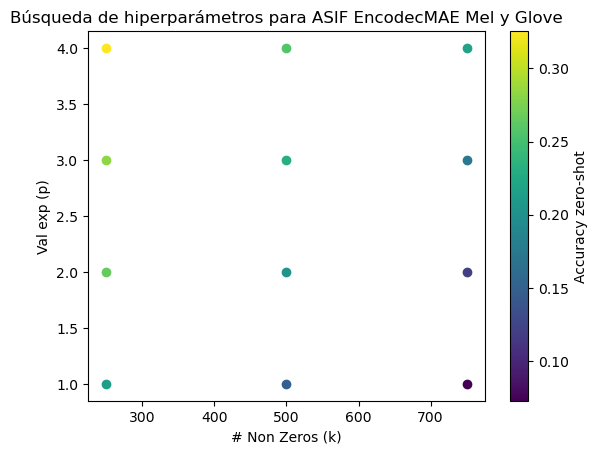

In [29]:
# Define the ranges for val_exp and non_zeros
val_exp_range = np.arange(1, 5, 1)  # from 1 to 4 inclusive
non_zeros_range = np.arange(250, 751, 250)  # from 250 to 2000 inclusive with a step of 250

# Generate data
data = np.zeros((len(val_exp_range), len(non_zeros_range)))

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        data[i, j] = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]

# Create the plot
fig, ax = plt.subplots()

# Create a scatter plot
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=data.min(), vmax=data.max())

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        ax.scatter(non_zeros, val_exp, color=cmap(norm(data[i, j])))

# Add a color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Accuracy zero-shot')


ax.set_title('Búsqueda de hiperparámetros para ASIF EncodecMAE Mel y Glove')
ax.set_xlabel('# Non Zeros (k)')
ax.set_ylabel('Val exp (p)')

plt.show()

In [30]:
# Probamos con algunos puntos mas
additional_points = [
    (1, 100),
    (2, 100),
    (3, 100),
    (4, 10),
    (4, 50),
    (4, 100),
    (4, 150),
    (4, 200),
    (4, 250),  # (val_exp, non_zeros)
    (5, 250),  # (val_exp, non_zeros)
    (6, 250),
    (7, 250),
    (8, 250),
    (9, 250),   
]

# Agregar los puntos adicionales al gráfico
for val_exp, non_zeros in additional_points:
    accuracy = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]
    print(f'val_exp: {val_exp} and non_zeros: {non_zeros} with zero-shot accuracy: {accuracy}')

val_exp: 1 and non_zeros: 100 with zero-shot accuracy: 0.3138592750533049
val_exp: 2 and non_zeros: 100 with zero-shot accuracy: 0.3320540156361052
val_exp: 3 and non_zeros: 100 with zero-shot accuracy: 0.33702914001421463
val_exp: 4 and non_zeros: 10 with zero-shot accuracy: 0.11997157071783937
val_exp: 4 and non_zeros: 50 with zero-shot accuracy: 0.3353233830845771
val_exp: 4 and non_zeros: 100 with zero-shot accuracy: 0.3221037668798863
val_exp: 4 and non_zeros: 150 with zero-shot accuracy: 0.35266524520255865
val_exp: 4 and non_zeros: 200 with zero-shot accuracy: 0.34541577825159914
val_exp: 4 and non_zeros: 250 with zero-shot accuracy: 0.32551528073916136
val_exp: 5 and non_zeros: 250 with zero-shot accuracy: 0.33077469793887704
val_exp: 6 and non_zeros: 250 with zero-shot accuracy: 0.36631130063965883
val_exp: 7 and non_zeros: 250 with zero-shot accuracy: 0.3633262260127932
val_exp: 8 and non_zeros: 250 with zero-shot accuracy: 0.35181236673773986
val_exp: 9 and non_zeros: 250 wi

# BEATs and BERT

In [31]:
def get_accuracy_top1(j=6, h=0, p=6, k=250):
    asif_value = 0
    with open(f'retrieval_iter3_layer5_bert-base-uncased_layer10_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    words = []
    count_top1 = 0 
    keys_test = [retrieval['all_values'][i] for i in retrieval['rows_deleted']]
    total = len(keys_test)
    for i in range(total):
        word = keys_test[i]
        k_1 = retrieval['retrieval_indices'][i][0]
        if word == retrieval['keys_anchors'][k_1]:
            count_top1 += 1
    asif_value = count_top1 / total
    return asif_value, words 

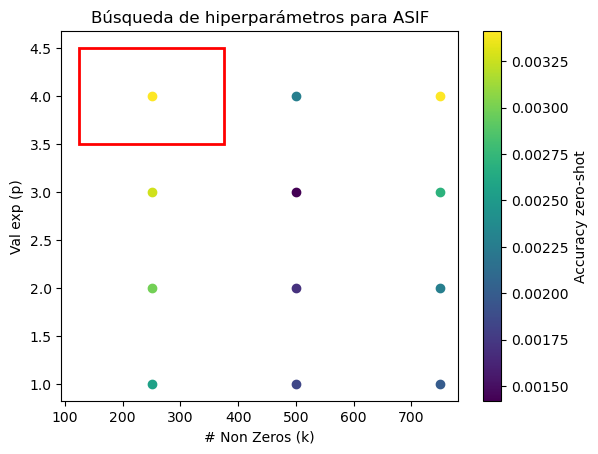

In [32]:
# Define the ranges for val_exp and non_zeros
val_exp_range = np.arange(1, 5, 1)  # from 1 to 4 inclusive
non_zeros_range = np.arange(250, 751, 250)  # from 250 to 2000 inclusive with a step of 250

# Generate data
data = np.zeros((len(val_exp_range), len(non_zeros_range)))

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        data[i, j] = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]

# Create the plot
fig, ax = plt.subplots()

# Create a scatter plot
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=data.min(), vmax=data.max())

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        ax.scatter(non_zeros, val_exp, color=cmap(norm(data[i, j])))

# Add a color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Accuracy zero-shot')

# Highlight a specific point (e.g., val_exp=8, non_zeros=750)
highlight_point_val_exp = 4  # Change to your specific point
highlight_point_non_zeros = 250  # Change to your specific point

# Find the index of the highlight point
highlight_val_exp_idx = np.where(val_exp_range == highlight_point_val_exp)[0][0]
highlight_non_zeros_idx = np.where(non_zeros_range == highlight_point_non_zeros)[0][0]

# Draw a red rectangle around the highlight point
rect = plt.Rectangle((highlight_point_non_zeros - 125, highlight_point_val_exp - 0.5), 250, 1, 
                     edgecolor='red', facecolor='none', linewidth=2)
ax.add_patch(rect)

ax.set_title('Búsqueda de hiperparámetros para ASIF')
ax.set_xlabel('# Non Zeros (k)')
ax.set_ylabel('Val exp (p)')

plt.show()

In [33]:
# Probamos con 4 puntos mas
additional_points = [
    (1, 100),
    (2, 100),
    (3, 100),
    (4, 10),
    (4, 50),
    (4, 100),
    (4, 150),
    (4, 200),
    (4, 250),  # (val_exp, non_zeros)
    (5, 250),  # (val_exp, non_zeros)
    (6, 250),
    (7, 250),
    (8, 250),
    (9, 250),   
]

# Agregar los puntos adicionales al gráfico
for val_exp, non_zeros in additional_points:
    accuracy = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]
    print(f'val_exp: {val_exp} and non_zeros: {non_zeros} with zero-shot accuracy: {accuracy}')

val_exp: 1 and non_zeros: 100 with zero-shot accuracy: 0.003411513859275053
val_exp: 2 and non_zeros: 100 with zero-shot accuracy: 0.003127221037668799
val_exp: 3 and non_zeros: 100 with zero-shot accuracy: 0.0036958066808813078
val_exp: 4 and non_zeros: 10 with zero-shot accuracy: 0.0029850746268656717
val_exp: 4 and non_zeros: 50 with zero-shot accuracy: 0.003127221037668799
val_exp: 4 and non_zeros: 100 with zero-shot accuracy: 0.003837953091684435
val_exp: 4 and non_zeros: 150 with zero-shot accuracy: 0.003980099502487562
val_exp: 4 and non_zeros: 200 with zero-shot accuracy: 0.0032693674484719263
val_exp: 4 and non_zeros: 250 with zero-shot accuracy: 0.003411513859275053
val_exp: 5 and non_zeros: 250 with zero-shot accuracy: 0.0036958066808813078
val_exp: 6 and non_zeros: 250 with zero-shot accuracy: 0.005259417199715707
val_exp: 7 and non_zeros: 250 with zero-shot accuracy: 0.003980099502487562
val_exp: 8 and non_zeros: 250 with zero-shot accuracy: 0.00042643923240938164
val_exp:

# BEATs and GloVe

In [34]:
def get_accuracy_top1(j=6, h=0, p=6, k=250):
    asif_value = 0
    with open(f'retrieval_iter3_layer3_glove_layer0_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    words = []
    count_top1 = 0 
    keys_test = [retrieval['all_values'][i] for i in retrieval['rows_deleted']]
    total = len(keys_test)
    for i in range(total):
        word = keys_test[i]
        k_1 = retrieval['retrieval_indices'][i][0]
        if word == retrieval['keys_anchors'][k_1]:
            count_top1 += 1
    asif_value = count_top1 / total
    return asif_value, words 

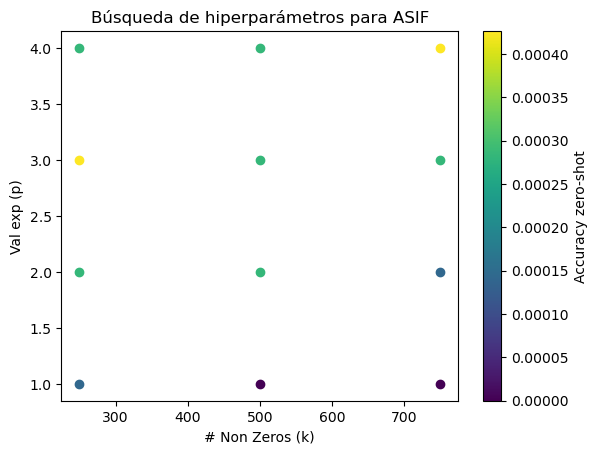

In [35]:
# Define the ranges for val_exp and non_zeros
val_exp_range = np.arange(1, 5, 1)  # from 1 to 4 inclusive
non_zeros_range = np.arange(250, 751, 250)  # from 250 to 2000 inclusive with a step of 250

# Generate data
data = np.zeros((len(val_exp_range), len(non_zeros_range)))

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        data[i, j] = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]

# Create the plot
fig, ax = plt.subplots()

# Create a scatter plot
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=data.min(), vmax=data.max())

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        ax.scatter(non_zeros, val_exp, color=cmap(norm(data[i, j])))

# Add a color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Accuracy zero-shot')

# Highlight a specific point (e.g., val_exp=8, non_zeros=750)
highlight_point_val_exp = 4  # Change to your specific point
highlight_point_non_zeros = 250  # Change to your specific point

# Find the index of the highlight point
highlight_val_exp_idx = np.where(val_exp_range == highlight_point_val_exp)[0][0]
highlight_non_zeros_idx = np.where(non_zeros_range == highlight_point_non_zeros)[0][0]

ax.set_title('Búsqueda de hiperparámetros para ASIF')
ax.set_xlabel('# Non Zeros (k)')
ax.set_ylabel('Val exp (p)')

plt.show()

In [36]:
# Probamos con 4 puntos mas
additional_points = [
    (1, 100),
    (2, 100),
    (3, 100),
    (4, 10),
    (4, 50),
    (4, 100),
    (4, 150),
    (4, 200),
    (4, 250),  # (val_exp, non_zeros)
    (5, 250),  # (val_exp, non_zeros)
    (6, 250),
    (7, 250),
    (8, 250),
    (9, 250),   
]

# Agregar los puntos adicionales al gráfico
for val_exp, non_zeros in additional_points:
    accuracy = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]
    print(f'val_exp: {val_exp} and non_zeros: {non_zeros} with zero-shot accuracy: {accuracy}')

val_exp: 1 and non_zeros: 100 with zero-shot accuracy: 0.0014214641080312722
val_exp: 2 and non_zeros: 100 with zero-shot accuracy: 0.0005685856432125089
val_exp: 3 and non_zeros: 100 with zero-shot accuracy: 0.00014214641080312722
val_exp: 4 and non_zeros: 10 with zero-shot accuracy: 0.0
val_exp: 4 and non_zeros: 50 with zero-shot accuracy: 0.0
val_exp: 4 and non_zeros: 100 with zero-shot accuracy: 0.0
val_exp: 4 and non_zeros: 150 with zero-shot accuracy: 0.0
val_exp: 4 and non_zeros: 200 with zero-shot accuracy: 0.00014214641080312722
val_exp: 4 and non_zeros: 250 with zero-shot accuracy: 0.00028429282160625445
val_exp: 5 and non_zeros: 250 with zero-shot accuracy: 0.00028429282160625445
val_exp: 6 and non_zeros: 250 with zero-shot accuracy: 0.00028429282160625445
val_exp: 7 and non_zeros: 250 with zero-shot accuracy: 0.00028429282160625445
val_exp: 8 and non_zeros: 250 with zero-shot accuracy: 0.00028429282160625445
val_exp: 9 and non_zeros: 250 with zero-shot accuracy: 0.000142146